In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

original_cave_path = "gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/cave/*.mid"
original_city_path = "gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/city/*.mid"
original_forest_path = "gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/forest/*.mid"
original_mountain_path = "gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/mountain/*.mid"
original_route_path = "gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/route/*.mid"
original_sea_ocean_path = "gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/sea_ocean/*.mid"
original_tower_path = "gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/tower/*.mid"

battle_output_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/battle_output/'
ow_output_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/ow_output/'
mixed_output_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/mixed_output/'

battle_tracks_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/pkmn_battle_ost/*.mid'
overworld_tracks_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/pkmn_ow_ost/*.mid'
mixed_tracks_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/pkmn_ost/*.mid'

battle_output_tracks_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/battle_output/trained3/*.mid'
overworld_output_tracks_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/ow_output/trained/*.mid'
mixed_output_tracks_path = 'gdrive/MyDrive/Colab Notebooks/pokemon_tracks/mixed_output/trained/*.mid'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install music21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-ly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/sniperwrb/python-midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sniperwrb/python-midi to /tmp/pip-req-build-p7eb6lnt
  Running command git clone --filter=blob:none --quiet https://github.com/sniperwrb/python-midi /tmp/pip-req-build-p7eb6lnt
  Resolved https://github.com/sniperwrb/python-midi to commit ec8071b56500dbf58d5a5650ca81990d855dc49f
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for midi
  Running setup.py clean for midi
Failed to build midi
ERROR: Could not build wheels for midi, which is required to install pyproject.toml-based projects


In [ ]:

# Importing Libraries
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import pandas as pd
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
from music21 import converter, instrument, note, chord, stream
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import CuDNNLSTM, LSTM, Bidirectional
from keras.layers import Activation
import keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import os
import glob
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')
import copy
import json
from pprint import pprint
from sklearn.model_selection import LeaveOneOut

In [ ]:
############### LOADING DATA ###############
# Extracting Notes

def extract_notes():
    notes = []
    for i,file in enumerate(glob.glob(original_tower_path)):
      midi = converter.parse(file)
      print('\r', 'Parsing file ', i, " ",file, end='')
      notes_to_parse = None
      try: # file has instrument parts
        s2 = instrument.partitionByInstrument(midi)
        notes_to_parse = s2.parts[0].recurse()
      except: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes
      for element in notes_to_parse:
        if isinstance(element, note.Note):
          notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
          notes.append('.'.join(str(n) for n in element.normalOrder))
    return notes

# Getting the list of notes as Corpus
Corpus = extract_notes()
print("Total number of notes from midis: ", len(Corpus))

# First 50 values in corpus
print("First fifty values in the Corpus:", Corpus[:50])

 Parsing file  14   gdrive/MyDrive/Colab Notebooks/pokemon_tracks/new_tracks/tower/Temp-Tower.midTotal number of notes from midis:  4288
First fifty values in the Corpus: ['E4', 'A3', 'D4', '4.9', 'F4', 'A3', 'A4', 'E-4', 'B4', 'E-4', 'D4', 'C5', '11.2', 'A4', 'D4', 'F4', 'C#4', 'E4', 'C#4', 'A3', 'D4', '4.9', 'F4', 'A3', 'D4', 'B-3', 'E4', 'B-3', 'A3', 'A3', 'A3', '10.3', 'E4', 'A2', '4.9', 'D4', '4.9', 'F4', '4.9', '3.5.9', 'B4', 'A2', '2.4', 'C5', '11.2.4', 'A4', '2.4', '1.3.5', 'E4', 'A2']


Total unique notes in the Corpus: 198
Average recurrenc for a note in Corpus: 21.656565656565657
Most frequent note in Corpus appeared: 398 times
Least frequent note in Corpus appeared: 1 time


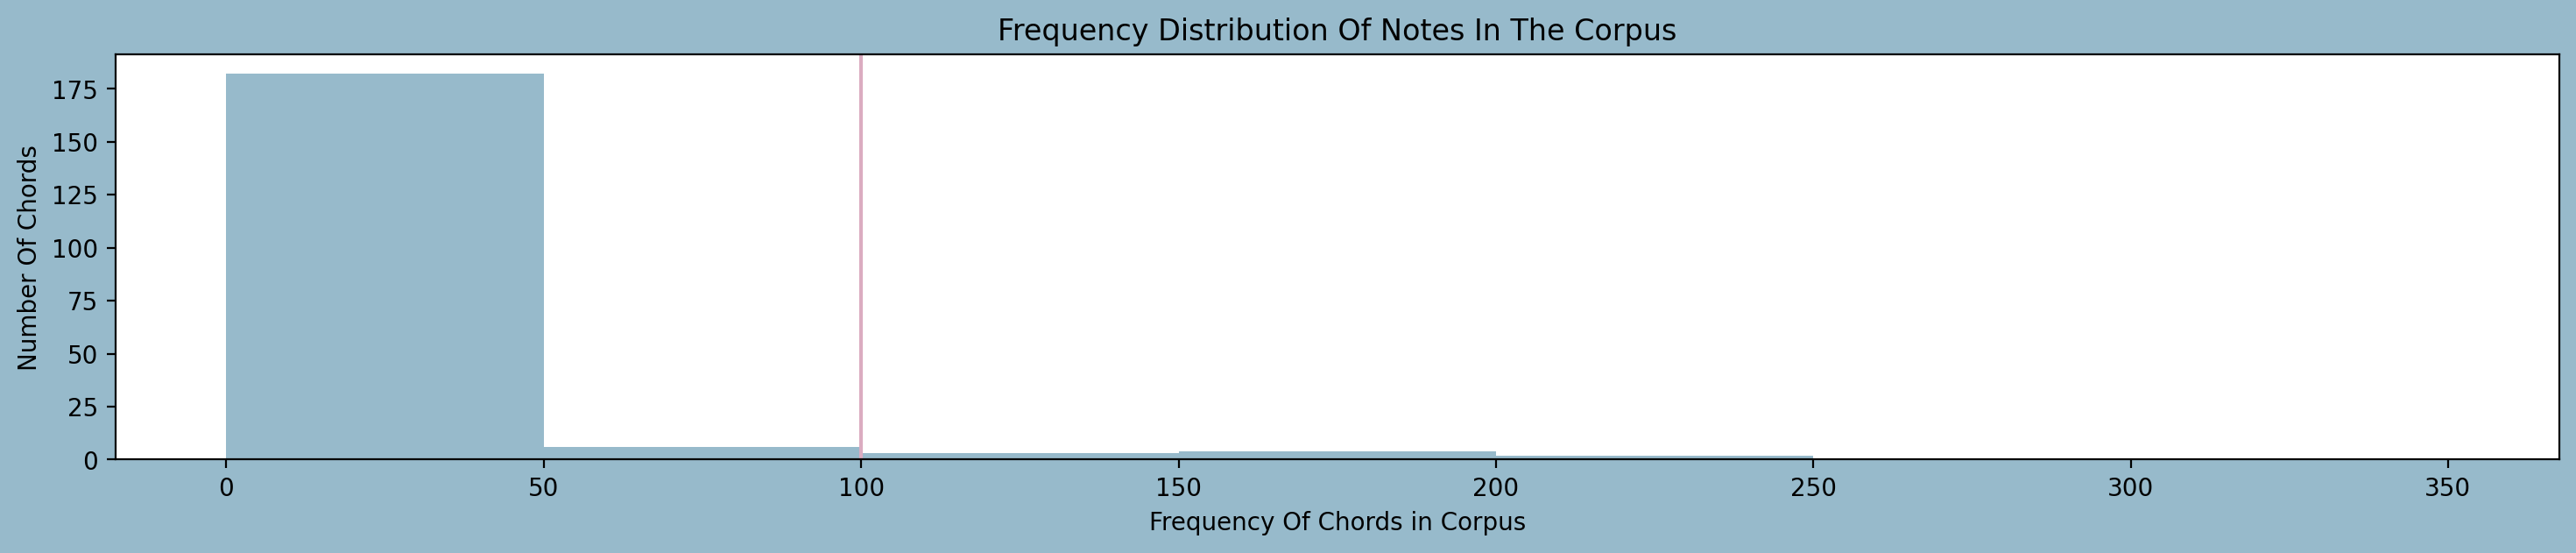

In [ ]:
# Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

# Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
# Average recurrenc for a note in Corpus

def Average(lst):
    return sum(lst) / len(lst)

print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

# Plotting the distribution of Notes
plt.figure(figsize=(18, 3), facecolor="#97BACB")
bins = np.arange(0, (max(Recurrence)), 50)
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100, color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

In [ ]:
############### DATA PREPROCESSING ###############

# Storing all the unique characters present in my corpus to bult a mapping dic.
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus)  # length of corpus
L_symb = len(symb)  # length of total unique characters

# Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

# Splitting the Corpus in equal length of strings and output target
length = 100
net_input = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    net_input.append([mapping[j] for j in feature])
    targets.append(mapping[target])


L_datapoints = len(targets)

# reshape X and normalize
X = (np.reshape(net_input, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tf.keras.utils.to_categorical(targets)

# Splitting Train and Seed datasets

# Taking out a subset of data to be used as seed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

Total number of characters: 4288
Number of unique characters: 198
[[[0.96969697]
  [0.34343434]
  [0.91919192]
  ...
  [0.6969697 ]
  [0.17676768]
  [0.54040404]]

 [[0.81313131]
  [0.75757576]
  [0.82323232]
  ...
  [0.93939394]
  [0.77777778]
  [0.75757576]]

 [[0.81313131]
  [0.82828283]
  [0.81313131]
  ...
  [0.82828283]
  [0.77777778]
  [0.81313131]]

 ...

 [[0.81313131]
  [0.72727273]
  [0.89393939]
  ...
  [0.81818182]
  [0.81818182]
  [0.81818182]]

 [[0.77777778]
  [0.82323232]
  [0.77777778]
  ...
  [0.81818182]
  [0.81818182]
  [0.81818182]]

 [[0.17171717]
  [0.59090909]
  [0.22222222]
  ...
  [0.76262626]
  [0.34848485]
  [0.28282828]]]


In [ ]:
# Building the model

#Initialising the Model
model = Sequential()
#Adding layers
model.add(CuDNNLSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add( tfa.layers.GELU() )
model.add(Dropout(0.2))
model.add(CuDNNLSTM(512))
model.add( tfa.layers.GELU() )
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training
model.compile(loss='categorical_crossentropy', optimizer=tfa.optimizers.Yogi(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
# Show the model architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_14 (CuDNNLSTM)   (None, 100, 512)          1054720   
                                                                 
 gelu_14 (GELU)              (None, 100, 512)          0         
                                                                 
 dropout_14 (Dropout)        (None, 100, 512)          0         
                                                                 
 cu_dnnlstm_15 (CuDNNLSTM)   (None, 512)               2101248   
                                                                 
 gelu_15 (GELU)              (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)              

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('gdrive/MyDrive/Colab Notebooks/pokemon_tracks/mixed_music_trained_model_255.h5')

In [ ]:
# Training the Model
history = model.fit(X_train, y_train, batch_size=256, epochs=70)

In [ ]:
#Plotting the learnings
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('gdrive/MyDrive/Colab Notebooks/pokemon_tracks/ow_music_trained_model_80_epochs.h5')

Epoch 1/100
11/11 [==============================] - 6s 369ms/step - loss: 5.2162 - accuracy: 0.0940 - val_loss: 5.0573 - val_accuracy: 0.0866
Epoch 2/100
11/11 [==============================] - 2s 178ms/step - loss: 4.7469 - accuracy: 0.0981 - val_loss: 4.4112 - val_accuracy: 0.0582
Epoch 3/100
11/11 [==============================] - 2s 194ms/step - loss: 4.3971 - accuracy: 0.0679 - val_loss: 4.2762 - val_accuracy: 0.0866
Epoch 4/100
11/11 [==============================] - 2s 197ms/step - loss: 4.3048 - accuracy: 0.0743 - val_loss: 4.2784 - val_accuracy: 0.0866
Epoch 5/100
11/11 [==============================] - 2s 182ms/step - loss: 4.2921 - accuracy: 0.0810 - val_loss: 4.2611 - val_accuracy: 0.0866
Epoch 6/100
11/11 [==============================] - 2s 180ms/step - loss: 4.2643 - accuracy: 0.1011 - val_loss: 4.2544 - val_accuracy: 0.0866
Epoch 7/100
11/11 [==============================] - 2s 195ms/step - loss: 4.2398 - accuracy: 0.0996 - val_loss: 4.1947 - val_accuracy: 0.0866

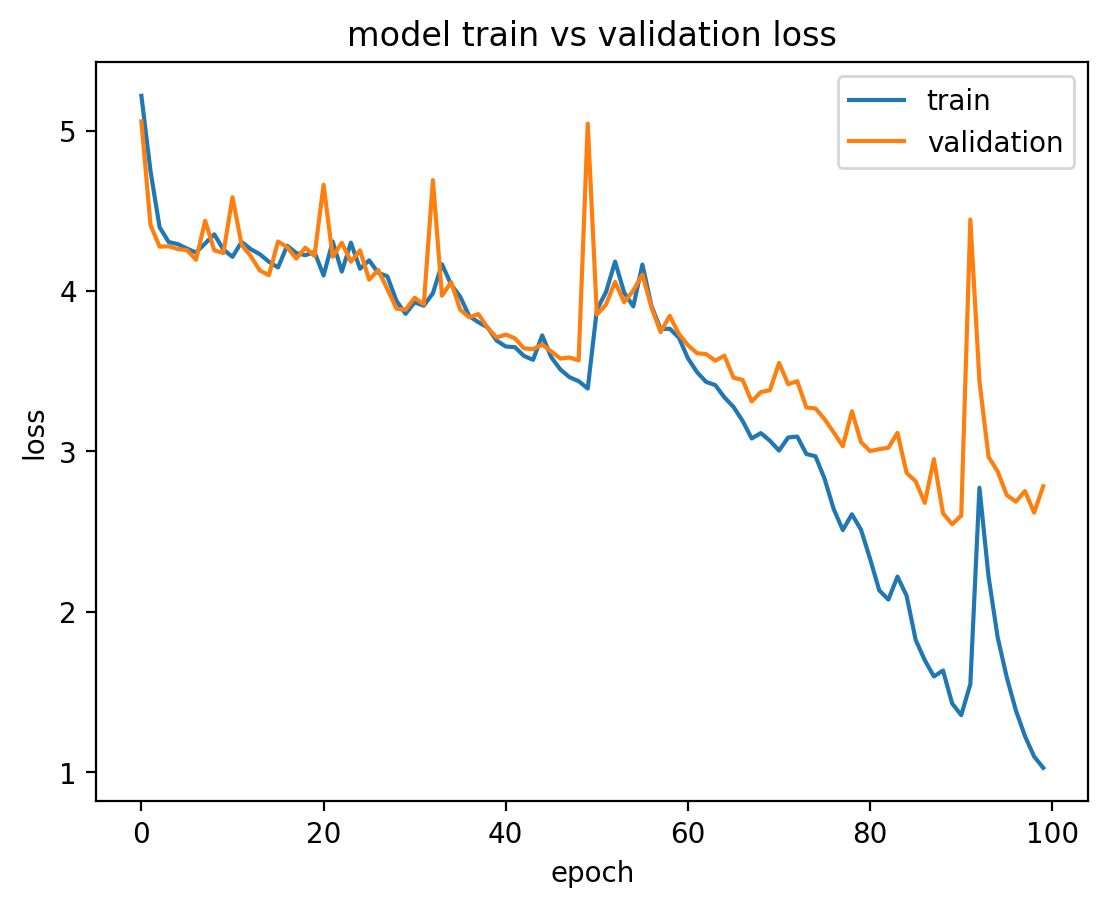

In [ ]:
# CHECK FOR OVERFITTING
history2 = model.fit(X_train, y_train, batch_size=256, epochs=100, validation_split=0.2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# GENERATE SONG
import pdb
def generate_notes(model, corpus, network_input, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    pitchnames = sorted(set(item for item in corpus))

    start = np.random.randint(0, len(network_input)-1)

    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    pattern = network_input[start]
    prediction_output = []

    # generate notes
    for note_index in range(200):
        prediction_input = np.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)

        prediction = model.predict(prediction_input, verbose=0)

        index = np.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)

        pattern = np.append(pattern,index)
        pattern = pattern[1:len(pattern)]

    return prediction_output

def create_midi(prediction_output, filename):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord

        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)
        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi','song_slow.mid')

    fctr = 1 # scale (in this case stretch) the overall tempo by this factor
    og_midi = music21.converter.parse('song_slow.mid')
    sped_midi = og_midi.scaleOffsets(fctr).scaleDurations(fctr)

    sped_midi.write('midi', fp='{}.mid'.format(filename))

for i in range(0,30):
    prediction_output = generate_notes(model, Corpus, net_input, L_symb)
    create_midi(prediction_output, ow_output_path + 'pokemon_midi' + str(i))

In [ ]:
def open_midi(midi_path, remove_drums):
    # There is an one-line method to read MIDIs
    # but to remove the drums we need to manipulate some
    # low level MIDI events.
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    if (remove_drums):
        for i in range(len(mf.tracks)):
            mf.tracks[i].events = [ev for ev in mf.tracks[i].events if ev.channel != 10]

    return midi.translate.midiFileToStream(mf)

original_midi = open_midi("gdrive/MyDrive/Colab Notebooks/pokemon_tracks/pkmn_battle_ost/Pokemon RubySapphireEmerald - Wild Pokemon Battle.mid", True)

def extract_notes_single(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)

    return ret, parent_element

def print_parts_countour(midi):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0

    # Drawing notes.
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes
        y, parent_element = extract_notes_single(top)
        if (len(y) < 1): continue

        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)

        aux = min(y)
        if (aux < minPitch): minPitch = aux

        aux = max(y)
        if (aux > maxPitch): maxPitch = aux

        aux = max(x)
        if (aux > xMax): xMax = aux

    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if (linePitch > minPitch and linePitch < maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))

    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Representation of notes during the melody')
    plt.show()

# Focusing only on 6 first measures to make it easier to understand.
print_parts_countour(original_midi.measures(0, 20))

In [ ]:
pokemon_midi = pretty_midi.PrettyMIDI("gdrive/MyDrive/Colab Notebooks/pokemon_tracks/pkmn_battle_ost/Pokemon RubySapphireEmerald - Wild Pokemon Battle.mid")
transition_matrix = pokemon_midi.get_pitch_class_transition_matrix()
plt.figure(figsize=(8,8))
plt.matshow(transition_matrix, fignum = 1)
plt.colorbar()
plt.xticks(range(12),
           ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'],)
plt.yticks(range(12),
           ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'],)

In [ ]:
piano_roll = pokemon_midi.instruments[0].get_piano_roll(fs=100)
sum_notes = np.sum(piano_roll, axis=1)
used_pitch = np.sum(sum_notes > 0)
print("The number of different pitches: ")
print(used_pitch)

The number of different pitches: 
24


In [ ]:
piano_roll = pokemon_midi.instruments[0].get_piano_roll(fs=100)
pitch_index = np.where(np.sum(piano_roll, axis=1) > 0)
p_range = np.max(pitch_index) - np.min(pitch_index)

print("Pitch range: ")
print(p_range)

Pitch range: 
56


In [ ]:
def list_instruments(midi):
    partStream = midi.parts.stream()
    print("List of instruments found on MIDI file:")
    for p in partStream:
        aux = p
        print (p.partName)

list_instruments(original_midi)

List of instruments found on MIDI file:
Piano
Piano


In [ ]:
def open_midi(midi_path, remove_drums):
    # There is an one-line method to read MIDIs
    # but to remove the drums we need to manipulate some
    # low level MIDI events.
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    if (remove_drums):
        for i in range(len(mf.tracks)):
            mf.tracks[i].events = [ev for ev in mf.tracks[i].events if ev.channel != 10]

    return midi.translate.midiFileToStream(mf)

generated_midi = open_midi("gdrive/MyDrive/Colab Notebooks/pokemon_tracks/battle_output/good_results/Copy of pokemon_midi22.mid", True)

def extract_notes_single(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)

    return ret, parent_element

def print_parts_countour(midi):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0

    # Drawing notes.
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes
        y, parent_element = extract_notes_single(top)
        if (len(y) < 1): continue

        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)

        aux = min(y)
        if (aux < minPitch): minPitch = aux

        aux = max(y)
        if (aux > maxPitch): maxPitch = aux

        aux = max(x)
        if (aux > xMax): xMax = aux

    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if (linePitch > minPitch and linePitch < maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))

    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Representation of notes during the melody')
    plt.show()

# Focusing only on 6 first measures to make it easier to understand.
print_parts_countour(generated_midi.measures(0, 20))

# We can take a look on the pitch histogram to see which notes are more used.
print("MOST USED NOTES")
generated_midi.plot('histogram', 'pitchClass', 'count')

In [ ]:
pokemon_midi = pretty_midi.PrettyMIDI("gdrive/MyDrive/Colab Notebooks/pokemon_tracks/battle_output/good_results/Copy of pokemon_midi22.mid")
transition_matrix = pokemon_midi.get_pitch_class_transition_matrix()
plt.figure(figsize=(8,8))
plt.matshow(transition_matrix, fignum = 1)
plt.colorbar()
plt.xticks(range(12),
           ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'],);
plt.yticks(range(12),
           ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'],);

In [ ]:
omrGTP = omr.evaluators.OmrGroundTruthPair(omr=original_midi, ground=generated_midi)
differences = omrGTP.getDifferences()
differences

In [ ]:
!pip list

In [ ]:
pip install matplotlib==2.0.0

In [ ]:
import pretty_midi
import numpy as np
import joblib
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
import matplotlib.gridspec
import collections
import os
# plotting.py contains utility functions for making nice histogram plots
import ploting

In [ ]:
def compute_statistics(midi_file):
    # Some MIDI files will raise Exceptions on loading, if they are invalid.
    # We just skip those.
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
        # Extract informative events from the MIDI file
        return {'n_instruments': len(pm.instruments),
                'program_numbers': [i.program for i in pm.instruments if not i.is_drum],
                'key_numbers': [k.key_number for k in pm.key_signature_changes],
                'tempos': list(pm.get_tempo_changes()[1]),
                'time_signature_changes': pm.time_signature_changes,
                'end_time': pm.get_end_time(),
                'lyrics': [l.text for l in pm.lyrics]}
    except Exception as e:
        pass

In [ ]:
statistics = joblib.Parallel(n_jobs=10, verbose=0)(
    joblib.delayed(compute_statistics)(midi_file)
    for midi_file in glob.glob(battle_tracks_path))
# When an error occurred, None will be returned; filter those out.
statistics = [s for s in statistics if s is not None]

In [ ]:
ploting.plot_hist([len(s['tempos']) for s in statistics], [0,1,2,3,4,5,6,7,8,9,10,11,30,100,1000],
                   'Number of tempo changes', 'Nr. midi files',1)
plt.xticks(np.arange(13)+1, ['1','2','3','4','5','6','7','8','9','10','11 - 30', '31 - 100', '101+'],
           rotation=45, ha='right');

In [ ]:
ploting.plot_hist([len(s['key_numbers']) for s in statistics], range(12),
                   'Number of key changes', 'Nr. midi files', 1)
plt.xticks(np.arange(-0.5, 10.5, 1), ['0','1','2','3','4','5','6','7','8','9','10+']);

In [ ]:
ploting.plot_hist([i for s in statistics for i in s['key_numbers']], range(25),
                   'Key', 'Occurrences', 1)
plt.xticks([-0.5, 1.5, 3.5, 4.5, 6.5, 8.5, 10.5, 11.5, 13.5, 15.5, 16.5, 18.5, 20.5, 22.5],
           ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'c', 'd', 'e', 'f', 'g', 'a', 'b']);

In [ ]:
statistics = joblib.Parallel(n_jobs=10, verbose=1)(
    joblib.delayed(compute_statistics)(midi_file)
    for midi_file in glob.glob(overworld_tracks_path))
# When an error occurred, None will be returned; filter those out.
statistics = [s for s in statistics if s is not None]

In [ ]:
ploting.plot_hist([len(s['tempos']) for s in statistics], [0,1,2,3,4,5,6,7,8,9,10,11,30,100,1000],
                   'Number of tempo changes', 'Nr. midi files',1)
plt.xticks(np.arange(13)+1, ['1','2','3','4','5','6','7','8','9','10','11 - 30', '31 - 100', '101+'],
           rotation=45, ha='right');

In [ ]:
ploting.plot_hist([len(s['key_numbers']) for s in statistics], range(12),
                   'Number of key changes', 'Nr. midi files', 1)
plt.xticks(np.arange(-0.5, 10.5, 1), ['0','1','2','3','4','5','6','7','8','9','10+']);

In [ ]:
ploting.plot_hist([i for s in statistics for i in s['key_numbers']], range(25),
                   'Key', 'Occurrences', 1)
plt.xticks([-0.5, 1.5, 3.5, 4.5, 6.5, 8.5, 10.5, 11.5, 13.5, 15.5, 16.5, 18.5, 20.5, 22.5],
           ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'c', 'd', 'e', 'f', 'g', 'a', 'b']);

In [ ]:
statistics = joblib.Parallel(n_jobs=10, verbose=1)(
    joblib.delayed(compute_statistics)(midi_file)
    for midi_file in glob.glob(battle_output_tracks_path))
# When an error occurred, None will be returned; filter those out.
statistics = [s for s in statistics if s is not None]

In [ ]:
ploting.plot_hist([len(s['tempos']) for s in statistics], [0,1,2,3,4,5,6,7,8,9,10,11,30,100,1000],
                   'Number of tempo changes', 'Nr. midi files',1)
plt.xticks(np.arange(13)+1, ['1','2','3','4','5','6','7','8','9','10','11 - 30', '31 - 100', '101+'],
           rotation=45, ha='right');

In [ ]:
ploting.plot_hist([len(s['key_numbers']) for s in statistics], range(12),
                   'Number of key changes', 'Nr. midi files',1)
plt.xticks(np.arange(-0.5, 10.5, 1), ['0','1','2','3','4','5','6','7','8','9','10+']);

In [ ]:
ploting.plot_hist([i for s in statistics for i in s['key_numbers']], range(25),
                   'Key', 'Occurrences', 1)
plt.xticks([-0.5, 1.5, 3.5, 4.5, 6.5, 8.5, 10.5, 11.5, 13.5, 15.5, 16.5, 18.5, 20.5, 22.5],
           ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'c', 'd', 'e', 'f', 'g', 'a', 'b']);